In [1]:
# Import modules
import matplotlib.pyplot as plt
from brian2_loihi import *

In [2]:
"""
Define a neuron group
"""

# Define a single neuron
loihi_group = LoihiNeuronGroup(
    1,
    refractory=2,
    threshold_v_mant=400,
    decay_v=1024,
    decay_I=1024
)

In [3]:
"""
Define input generators and spike times
"""

# Excitatory input spikes
ex_neuron_indices = [0, 0, 0, 0]
ex_spike_times = [12, 14, 40, 80]

# Inhibitory input spikes
in_neuron_indices = [0, 0, 0]
in_spike_times = [50, 60, 90]

# Define spike generators
generator_ex = LoihiSpikeGeneratorGroup(1, ex_neuron_indices, ex_spike_times)
generator_in = LoihiSpikeGeneratorGroup(1, in_neuron_indices, in_spike_times)

In [4]:
"""
Define synapses and connect
"""

# Connect excitatory generator with neuron
syn_ex = LoihiSynapses(generator_ex, loihi_group, sign_mode=synapse_sign_mode.EXCITATORY)
syn_ex.connect()
syn_ex.w = 124

# Connect inhibitory generator with neuron
syn_in = LoihiSynapses(generator_in, loihi_group, sign_mode=synapse_sign_mode.INHIBITORY)
syn_in.connect()
syn_in.w = -124

In [5]:
"""
Define probes using state monitors
"""

# Probe synaptic input using a state monitor
mon_I = LoihiStateMonitor(loihi_group, 'I')
# Probe voltage using a state monitor
mon_v = LoihiStateMonitor(loihi_group, 'v')

In [6]:
"""
Define a network and perform simulation
"""

# NOTE: It is important to use the LoihiNetwork,
#       using Brian's magic network is not provided
net = LoihiNetwork(
    loihi_group,
    generator_in,
    generator_ex,
    syn_ex,
    syn_in,
    mon_I,
    mon_v
)

# Run the simulation
net.run(100, report='text')

Starting simulation at t=0. s for a duration of 100. ms


100. ms (100%) simulated in < 1s


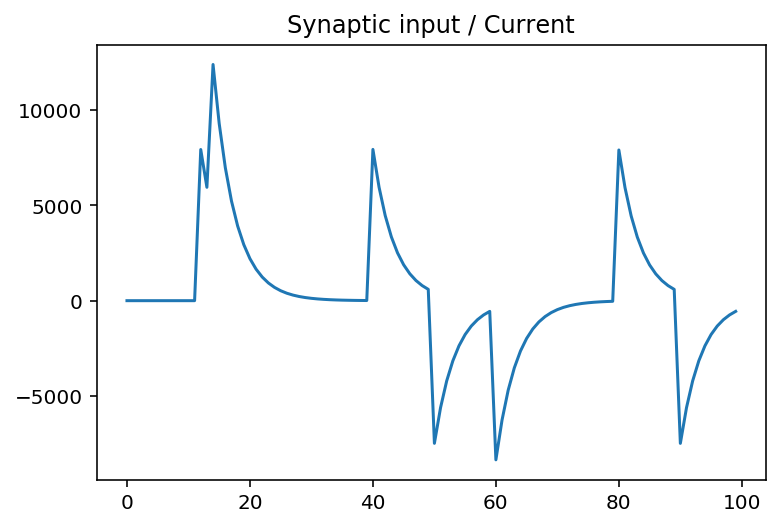

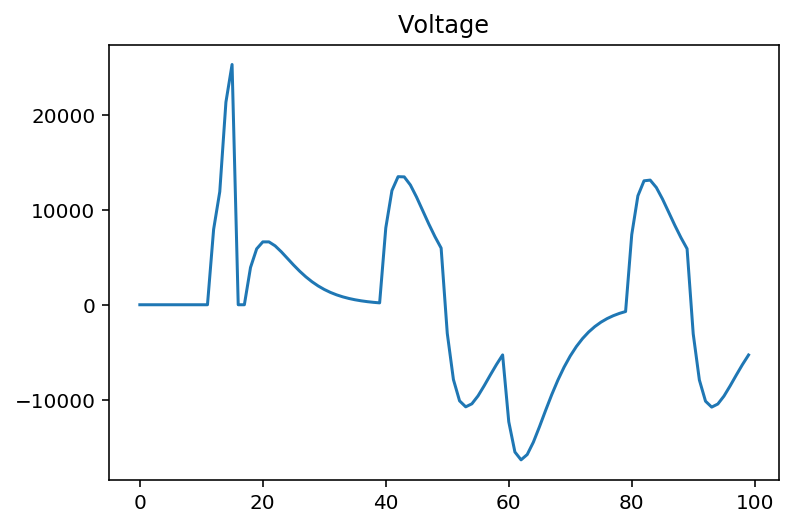

In [7]:
"""
Plot results
"""

# Plot synaptic input (current)
plt.plot(mon_I.I[0])
plt.title('Synaptic input / Current')
pl = plt.show()

# Plot voltage
plt.plot(mon_v.v[0])
plt.title('Voltage')
pl = plt.show()